In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("train-data.csv")

In [3]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
df.tail()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65
6018,6018,Chevrolet Beat Diesel,Hyderabad,2011,47000,Diesel,Manual,First,25.44 kmpl,936 CC,57.6 bhp,5.0,NaN,2.50


In [5]:
df.shape

(6019, 14)

In [6]:
df.drop(["Unnamed: 0","New_Price"],axis=1,inplace=True)

In [7]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [9]:
# data cleaning

In [10]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [11]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [12]:
# There are very very less car with LPG and Electric as fuel system so we can drop it

In [13]:
i=df[(df['Fuel_Type']=='LPG') | (df['Fuel_Type']=='Electric')].index
df.drop(i,axis=0,inplace=True)

In [14]:
df['Transmission'].value_counts()

Manual       4289
Automatic    1718
Name: Transmission, dtype: int64

In [15]:
df['Owner_Type'].value_counts()

First             4919
Second             966
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [16]:
i=df[df['Owner_Type']=='Fourth & Above'].index
df.drop(i,axis=0,inplace=True)

In [17]:
df['Owner_Type'].value_counts()

First     4919
Second     966
Third      113
Name: Owner_Type, dtype: int64

In [18]:
# Fourth & Above category is very very less so we drop it

In [19]:
df['Seats'].value_counts()

5.0     4998
7.0      672
8.0      132
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [20]:
df[df['Seats']>8]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
814,Toyota Qualis FS B2,Pune,2004,77757,Diesel,Manual,Second,13.1 kmpl,2446 CC,75 bhp,10.0,3.50
917,Tata Sumo DX,Mumbai,2013,20000,Diesel,Manual,First,14.07 kmpl,1978 CC,83.1 bhp,10.0,5.25
1347,Mahindra Scorpio LX BS IV,Bangalore,2007,74112,Diesel,Manual,First,12.05 kmpl,2179 CC,120 bhp,9.0,4.10
1907,Toyota Qualis FS B3,Bangalore,2002,63000,Diesel,Manual,Third,13.1 kmpl,2446 CC,75 bhp,10.0,3.65
2267,Toyota Qualis RS E2,Pune,2004,215750,Diesel,Manual,Second,0.0 kmpl,2446 CC,null bhp,10.0,3.50
2312,Chevrolet Tavera LT 9 Str BS IV,Kolkata,2012,67132,Diesel,Manual,First,13.58 kmpl,2499 CC,78 bhp,9.0,4.75
2359,Mahindra Xylo D2 Maxx,Chennai,2016,150000,Diesel,Manual,First,14.95 kmpl,2489 CC,93.7 bhp,9.0,4.50
2575,Chevrolet Tavera LS B3 10 Seats BSIII,Hyderabad,2015,120000,Diesel,Manual,First,14.8 kmpl,2499 CC,80 bhp,10.0,5.50


In [21]:
df['Seats']=np.where(df['Seats']>8,6,df['Seats'])

In [22]:
df.drop(df[df['Seats']==0].index,axis=0,inplace=True)

In [23]:
df['Seats'].value_counts()

5.0    4998
7.0     672
8.0     132
4.0      99
6.0      39
2.0      16
Name: Seats, dtype: int64

In [24]:
# 10 setaers and 0 seats sedan cars are not availables in realife
# so we can replace 10 setaers with mode of seats lets say 6

In [25]:
df['Name'].value_counts()

Mahindra XUV500 W8 2WD                 49
Maruti Swift VDI                       45
Honda City 1.5 S MT                    34
Maruti Swift Dzire VDI                 34
Maruti Swift VDI BSIV                  31
                                       ..
Mahindra Scorpio S10 AT 4WD             1
Hyundai i20 1.2 Era                     1
Toyota Camry W4 (AT)                    1
BMW 5 Series 2013-2017 520d M Sport     1
Mahindra Xylo D4 BSIV                   1
Name: Name, Length: 1862, dtype: int64

In [26]:
df['Model']=df['Name'].map(lambda x: str(x).strip().split(" ")[1])
df['Name']=df['Name'].map(lambda x: str(x).strip().split(" ")[0])

In [27]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65,Wagon


In [28]:
df['Year'].value_counts()

2014    796
2015    744
2016    740
2013    649
2017    587
2012    575
2011    464
2010    339
2018    298
2009    197
2008    171
2007    122
2019    102
2006     77
2005     56
2004     31
2003     17
2002     15
2001      7
2000      4
1998      4
1999      2
Name: Year, dtype: int64

In [29]:
df['Year']=df['Year'].astype(str)

In [30]:
df['Year']=np.where(df['Year'].astype(int)<2003,"less than 2003",df['Year'])

In [31]:
df['Year'].value_counts()

2014              796
2015              744
2016              740
2013              649
2017              587
2012              575
2011              464
2010              339
2018              298
2009              197
2008              171
2007              122
2019              102
2006               77
2005               56
less than 2003     32
2004               31
2003               17
Name: Year, dtype: int64

In [32]:
df['Mileage'].unique

<bound method Series.unique of 0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
6014     28.4 kmpl
6015     24.4 kmpl
6016     14.0 kmpl
6017     18.9 kmpl
6018    25.44 kmpl
Name: Mileage, Length: 5997, dtype: object>

In [33]:
df['Mileage']=df['Mileage'].map(lambda x:str(x).strip().split(" ")[0])

In [34]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75,Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199 CC,88.7 bhp,5.0,4.50,Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248 CC,88.76 bhp,7.0,6.00,Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968 CC,140.8 bhp,5.0,17.74,A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.4,1248 CC,74 bhp,5.0,4.75,Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120 CC,71 bhp,5.0,4.00,Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498 CC,112 bhp,8.0,2.90,Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.9,998 CC,67.1 bhp,5.0,2.65,Wagon


In [35]:
df['Mileage']=df['Mileage'].astype(float)


In [36]:
df['Engine'].unique


<bound method Series.unique of 0        998 CC
1       1582 CC
2       1199 CC
3       1248 CC
4       1968 CC
         ...   
6014    1248 CC
6015    1120 CC
6016    2498 CC
6017     998 CC
6018     936 CC
Name: Engine, Length: 5997, dtype: object>

In [37]:
def func(x):
    if x==None:
        return x
    elif len(str(x).split(" "))==2:
        return str(x).split(" ")[0]

In [38]:
df['Engine']=df['Engine'].apply(func)

In [39]:
df['Engine']=df['Engine'].astype(float)

In [40]:
df['Engine'].isnull().sum()

35

In [41]:
lst = df['Model'].unique()
for i in lst:
    mean_model = df[df["Model"]==i]['Engine'].mean()
    df.update(df[df['Model']==i]['Engine'].fillna(mean_model))

In [42]:
df['Power'].unique

<bound method Series.unique of 0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5997, dtype: object>

In [43]:
df['Power']=df['Power'].apply(func)

In [44]:
df['Power'].isnull().sum()

35

In [45]:
lst = df['Model'].unique()
for i in lst:
    mean_model = df[df["Model"]==i]['Seats'].mode(0)[0]
    df.update(df[df['Model']==i]['Seats'].fillna(mean_model))

In [46]:
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

In [47]:
a = df['Model'].unique()
for i in a:
    r = df[df["Model"]==i]['Power'].astype(float).mean()
    df.update(df[df['Model']==i]['Power'].fillna(r))

In [48]:
df.dropna(axis=0,inplace=True)

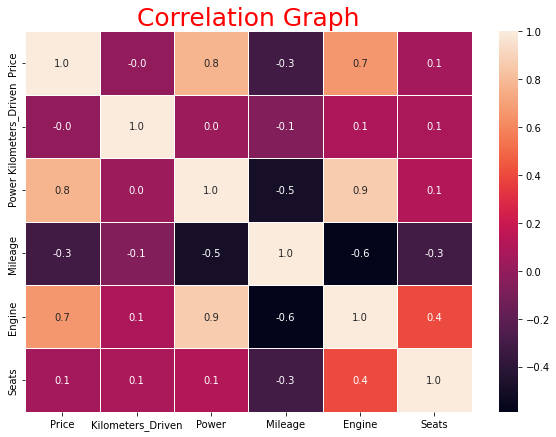

In [49]:
plt.figure(figsize=(10,7))
sns.heatmap(df[["Price","Kilometers_Driven","Power","Mileage","Engine","Seats"]].corr(), annot=True,linewidths=.5,fmt='.1f')
plt.title("Correlation Graph",c="r",size=25)
plt.show()

In [50]:
df['Car'] = df['Name'].astype(str) + " " + df['Model']

In [51]:
df

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Model,Car
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Wagon,Maruti Wagon
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Creta,Hyundai Creta
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Jazz,Honda Jazz
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,Ertiga,Maruti Ertiga
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,A4,Audi A4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Delhi,2014,27365,Diesel,Manual,First,28.40,1248.0,74.00,5.0,4.75,Swift,Maruti Swift
6015,Hyundai,Jaipur,2015,100000,Diesel,Manual,First,24.40,1120.0,71.00,5.0,4.00,Xcent,Hyundai Xcent
6016,Mahindra,Jaipur,2012,55000,Diesel,Manual,Second,14.00,2498.0,112.00,8.0,2.90,Xylo,Mahindra Xylo
6017,Maruti,Kolkata,2013,46000,Petrol,Manual,First,18.90,998.0,67.10,5.0,2.65,Wagon,Maruti Wagon


In [52]:
df = df[['Car','Location','Year','Kilometers_Driven','Owner_Type','Fuel_Type','Power','Price']]

In [53]:
df

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,Maruti Wagon,Mumbai,2010,72000,First,CNG,58.16,1.75
1,Hyundai Creta,Pune,2015,41000,First,Diesel,126.20,12.50
2,Honda Jazz,Chennai,2011,46000,First,Petrol,88.70,4.50
3,Maruti Ertiga,Chennai,2012,87000,First,Diesel,88.76,6.00
4,Audi A4,Coimbatore,2013,40670,Second,Diesel,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,Maruti Swift,Delhi,2014,27365,First,Diesel,74.00,4.75
6015,Hyundai Xcent,Jaipur,2015,100000,First,Diesel,71.00,4.00
6016,Mahindra Xylo,Jaipur,2012,55000,Second,Diesel,112.00,2.90
6017,Maruti Wagon,Kolkata,2013,46000,First,Petrol,67.10,2.65


In [54]:
len(df['Car'].value_counts()[df['Car'].value_counts()<10])

102

In [55]:
l = df['Car'].value_counts()[df['Car'].value_counts()<10].index
df[df['Car'].isin(l)]

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
21,Maruti S,Bangalore,2015,55392,Second,Diesel,88.50,8.25
28,Honda WRV,Kochi,2018,37430,First,Petrol,88.70,9.90
49,Mahindra Thar,Jaipur,2012,75800,Second,Diesel,105.00,5.50
58,Nissan X-Trail,Hyderabad,2010,121812,First,Diesel,147.60,7.75
67,Mercedes-Benz C-Class,Coimbatore,2019,15369,First,Diesel,194.00,35.67
...,...,...,...,...,...,...,...,...
5979,ISUZU D-MAX,Jaipur,2017,25000,First,Diesel,134.00,8.00
5982,Tata Hexa,Jaipur,2016,39000,First,Diesel,153.86,13.50
5990,Tata New,Pune,2008,86000,Third,Diesel,138.00,0.60
5999,Tata Bolt,Chennai,2016,10000,First,Petrol,88.70,4.00


In [56]:
df.drop(df[df['Car'].isin(l)].index,inplace=True,axis=0)

In [57]:
df_new = df.copy()

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
le = LabelEncoder()

In [60]:
lst = ['Car','Location','Fuel_Type']

In [61]:
for i in lst:
    le = LabelEncoder()
    df[i]=le.fit_transform(df[i]) 

In [62]:
df


,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,2010,72000,First,0,58.16,1.75
1,32,10,2015,41000,First,1,126.20,12.50
2,29,2,2011,46000,First,2,88.70,4.50
3,61,2,2012,87000,First,1,88.76,6.00
4,0,3,2013,40670,Second,1,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,65,4,2014,27365,First,1,74.00,4.75
6015,41,6,2015,100000,First,1,71.00,4.00
6016,52,6,2012,55000,Second,1,112.00,2.90
6017,67,8,2013,46000,First,2,67.10,2.65


In [63]:
df['Owner_Type'].value_counts()

First     4619
Second     900
Third      101
Name: Owner_Type, dtype: int64

In [64]:
dic = {'First':2,'Second':1,'Third':0}

In [65]:
df['Year'].value_counts()

2014              754
2015              706
2016              700
2013              610
2012              556
2017              536
2011              434
2010              316
2018              268
2009              188
2008              161
2007              113
2019               87
2006               74
2005               53
2004               27
less than 2003     26
2003               11
Name: Year, dtype: int64

In [66]:
dic1 = {'2019':17,"2018":16,"2017":15,"2016":14,"2015":13,"2014":12,"2013":11,"2012":10,"2011":9,"2010":8,"2009":7,"2008":6,"2007":5,"2006":4,"2005":3,"2004":2,"2003":1,"less than 2003":0 }


In [67]:
df['Owner_Type']=df['Owner_Type'].map(dic)
df['Year']=df['Year'].map(dic1)
df

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power,Price
0,67,9,8,72000,2,0,58.16,1.75
1,32,10,13,41000,2,1,126.20,12.50
2,29,2,9,46000,2,2,88.70,4.50
3,61,2,10,87000,2,1,88.76,6.00
4,0,3,11,40670,1,1,140.80,17.74
...,...,...,...,...,...,...,...,...
6014,65,4,12,27365,2,1,74.00,4.75
6015,41,6,13,100000,2,1,71.00,4.00
6016,52,6,10,55000,1,1,112.00,2.90
6017,67,8,11,46000,2,2,67.10,2.65


In [68]:
X = df.drop("Price",axis=1)   #X --- > Independent variables
Y= df['Price']                #Y --- > Dependent variables

In [69]:
X

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power
0,67,9,8,72000,2,0,58.16
1,32,10,13,41000,2,1,126.20
2,29,2,9,46000,2,2,88.70
3,61,2,10,87000,2,1,88.76
4,0,3,11,40670,1,1,140.80
...,...,...,...,...,...,...,...
6014,65,4,12,27365,2,1,74.00
6015,41,6,13,100000,2,1,71.00
6016,52,6,10,55000,1,1,112.00
6017,67,8,11,46000,2,2,67.10


In [70]:
Y

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5620, dtype: float64

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [72]:
X_train

,Car,Location,Year,Kilometers_Driven,Owner_Type,Fuel_Type,Power
3413,43,9,12,17858,2,2,80.00
1581,102,9,10,78000,2,1,138.10
4886,39,5,5,76000,2,2,62.30
5085,65,8,7,34000,2,1,73.90
5147,49,10,10,99000,0,1,120.00
...,...,...,...,...,...,...,...
977,12,1,10,65000,2,1,57.60
5563,29,4,9,69768,2,2,90.00
4273,89,9,14,53000,2,2,177.46
256,100,10,15,43000,2,1,147.80


In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [74]:
lr.fit(X_train, Y_train)
y_pred= lr.predict(X_test)
print("Accuracy on Traing set: ",lr.score(X_train,Y_train))
print("Accuracy on Testing set: ",lr.score(X_test,Y_test))

Accuracy on Traing set:  0.6660917725728737
Accuracy on Testing set:  0.6919927424316308


In [75]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)

In [76]:
rf.fit(X_train, Y_train)
y_pred= rf.predict(X_test)

print("Accuracy on Traing set: ",rf.score(X_train,Y_train))
print("Accuracy on Testing set: ",rf.score(X_test,Y_test))

Accuracy on Traing set:  0.9839945138594774
Accuracy on Testing set:  0.9164481724943032


In [77]:
# RandomForestRegressor is very much better than LinearRegression